In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [52]:
f = r.TFile("./data/gm2offline_ana.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")

In [53]:
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :    92000 : Total =        54908301 bytes  File  Size =   24675891 *
*        :          : Tree compression factor =   2.22                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :    92000 : Total  Size=     369545 bytes  File Size  =       3276 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression= 112.64     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :    92000 : Total  Size=     369593 bytes  File Size  =       3372 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression= 109.44     *
*...............................................

# Verification that I haven't screwed anything up with this recent change

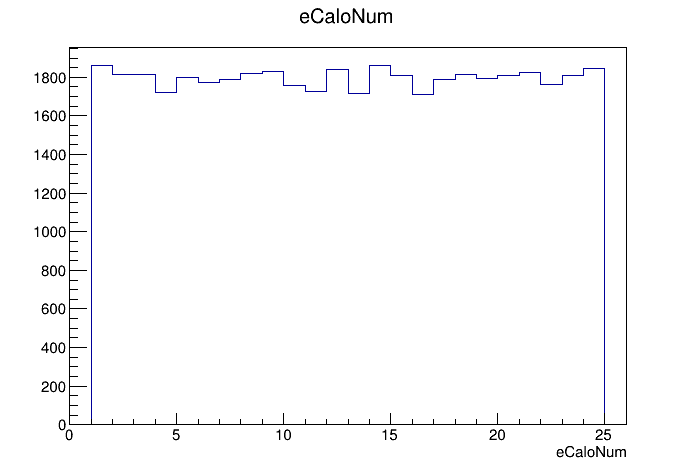

In [54]:
c = r.TCanvas()
t.Draw("eCaloNum")
c.Draw()

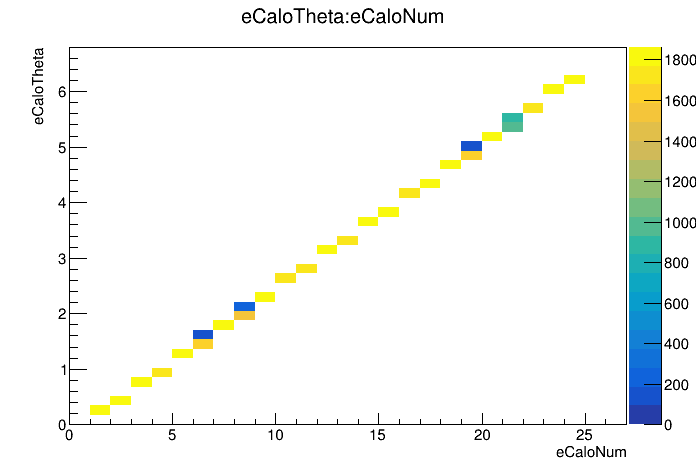

In [55]:
c = r.TCanvas()
t.Draw("eCaloTheta:eCaloNum","","colz")
c.Draw()

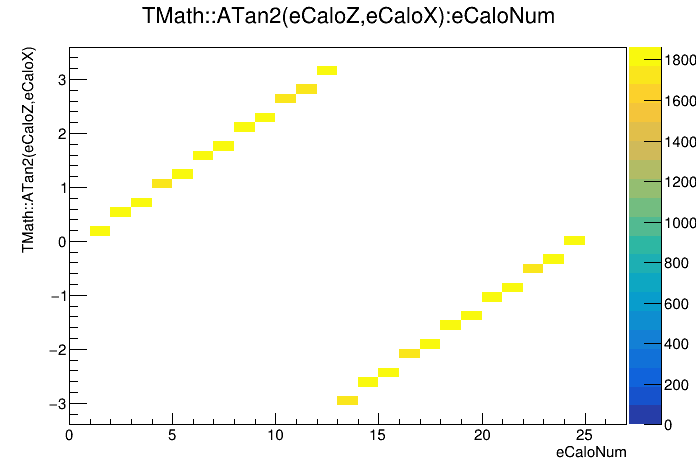

In [56]:
c = r.TCanvas()
t.Draw("TMath::ATan2(eCaloZ,eCaloX):eCaloNum","","colz")
c.Draw()

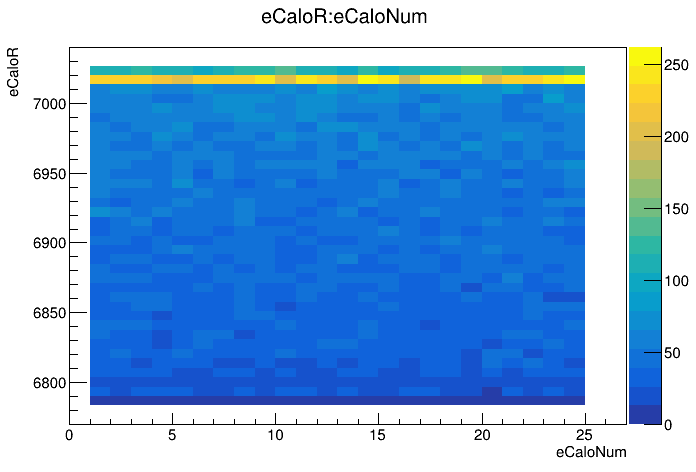

In [57]:
c = r.TCanvas()
t.Draw("eCaloR:eCaloNum","","colz")
c.Draw()

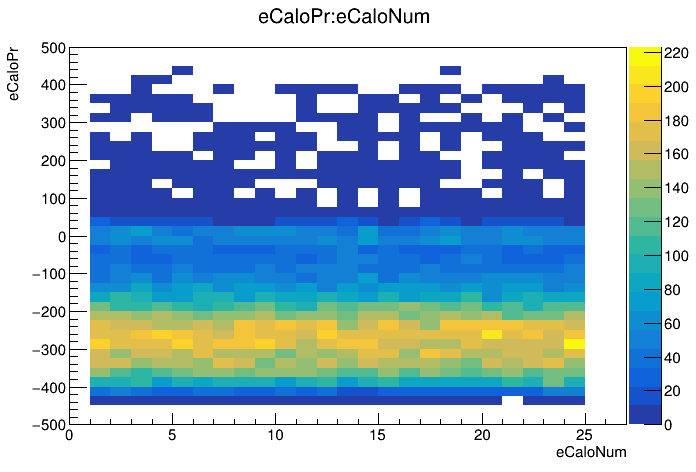

In [58]:
c = r.TCanvas()
t.Draw("eCaloPr:eCaloNum","","colz")
c.Draw()

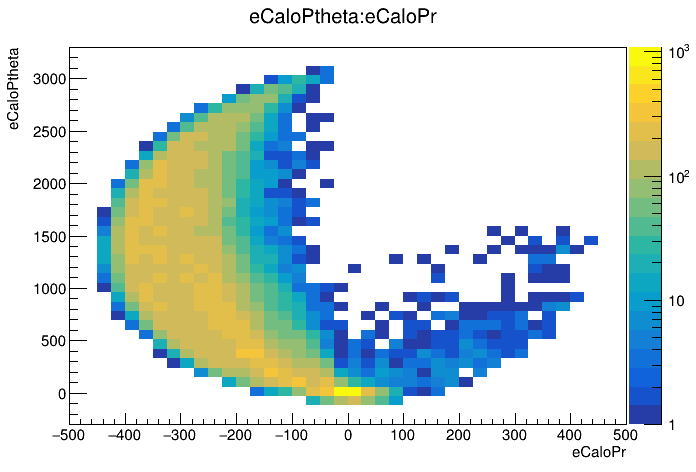

In [68]:
c = r.TCanvas()
t.Draw("eCaloPtheta:eCaloPr","","colz")
c.SetLogz()
c.Draw()

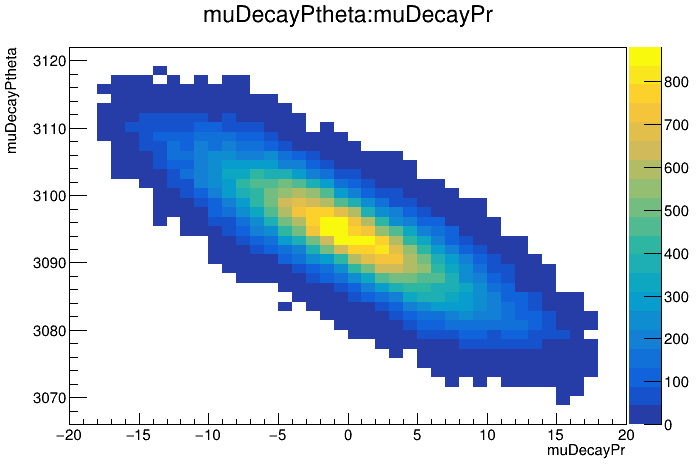

In [66]:
c = r.TCanvas()
t.Draw("muDecayPtheta:muDecayPr","","colz")
c.Draw()

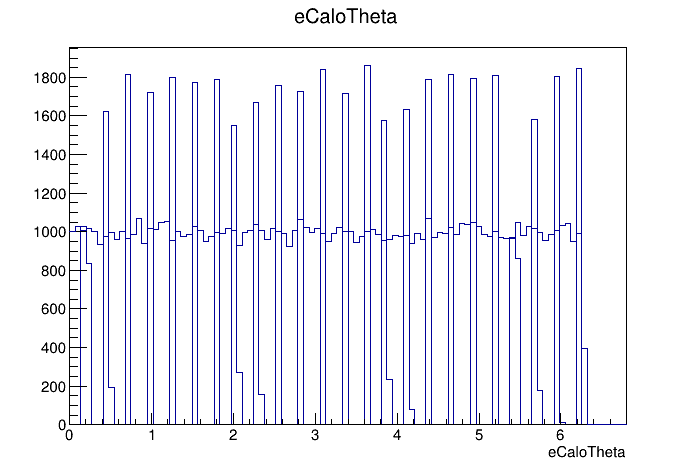

In [62]:
c = r.TCanvas()
t.Draw("eCaloTheta","","colz")
t.Draw("muDecayTheta","","colz same")
c.Draw()

In [63]:
def y(x,i):
    return np.sqrt(1 - x**2)*i

In [64]:
x = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
yx = [y(i, 1) for i in x]
yx2 = [y(i, -1) for i in x]

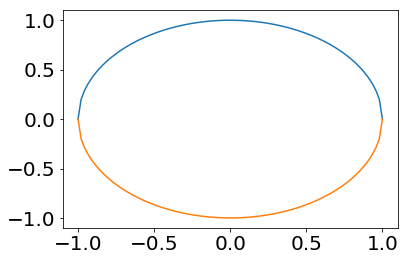

In [31]:
plt.plot(x,yx)
plt.plot(x2,yx2)
plt.show()

In [49]:
theta = [r.TMath.ATan2(yi,xi) for (yi,xi) in zip(x,yx)]
theta2 = [r.TMath.ATan2(yi,xi) for (yi,xi) in zip(x2,yx2)]

for i, ti in enumerate(theta):
    if ti < 0:
        theta[i] = ti + 2*r.TMath.Pi()

for i, ti in enumerate(theta2):
    if ti < 0:
        theta2[i] = ti + 2*r.TMath.Pi()

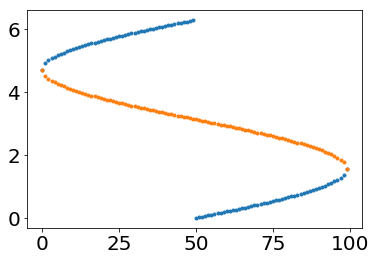

In [50]:
plt.plot(theta,".")
plt.plot(theta2,".")

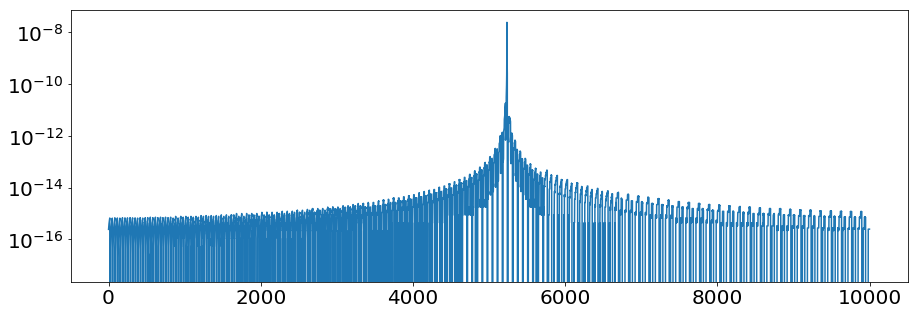

In [75]:
diffVec = []
fig,ax = plt.subplots(figsize=(15,5))
for i in np.linspace(0,3,10000):
    diffVec.append( r.TMath.Tan(i) - r.TMath.Tan(i + 2*r.TMath.Pi() ) )
plt.plot(diffVec,"-")
plt.yscale("log")
plt.show()